#  First Colab Tuning (İf  using)


In [39]:
# Control for directory
!ls

128out.csv     5.1-introduction-to-convnets.ipynb	    images.png
16out.csv      64out.csv				    simplenet_relu.h5
1.png	       C_Algoritihms_Comparison			    Untitled1.ipynb
32out.csv      deneme.py
32out.csv.ods  Image_Classifier_Algorithms_Comparing.ipynb


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import sys
sys.path.insert(0, 'drive/app')

In [0]:
import os
os.chdir("drive/app")

In [6]:
!ls

128out.csv     5.1-introduction-to-convnets.ipynb	    images.png
16out.csv      64out.csv				    simplenet_relu.h5
1.png	       C_Algoritihms_Comparison			    Untitled1.ipynb
32out.csv      deneme.py
32out.csv.ods  Image_Classifier_Algorithms_Comparing.ipynb


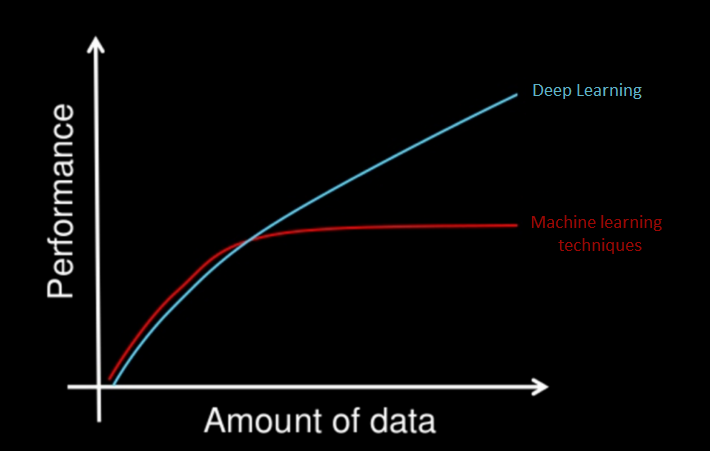

# Contents
- Starting
- Description Data
- Classic Machine Learning applications
    
    - Logistic Regression
    - SVM
    
- Deep & Neural Network
    
    - Multilayer Perceptron
    - Deep  Neural Networks
    - Convolutional Nueral Networks
    - Convolutional Nueral Networks with data augmentation
- Advanced Models
    - SimleNetV1
    - Resnet
    

## Starting - Main Idea

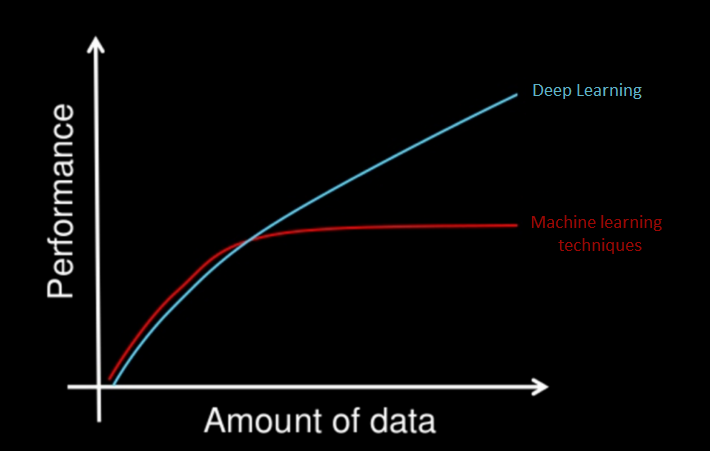

In [12]:
from IPython.display import Image
Image("1.png")

from : http://cs229.stanford.edu/materials/CS229-DeepLearning.pdf

In [0]:
# Common Libraries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

## Description Data

In [8]:
face=fetch_lfw_people(min_faces_per_person=80)
print(face.data.shape)
print(face.target_names)
print(face.images.shape)

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


(1140, 2914)
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


In [9]:
x=face.data/255
y=face.target
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y)
x_tr.shape

(855, 2914)

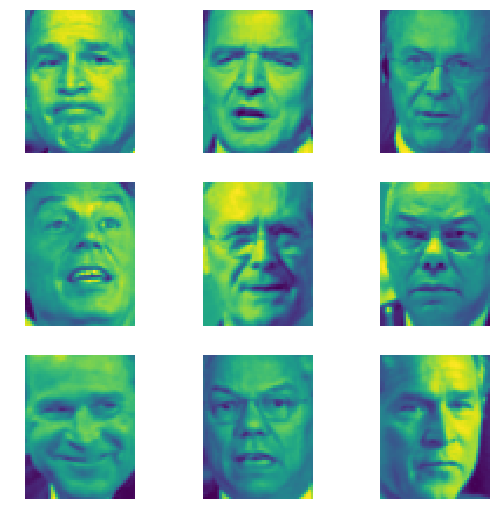

In [10]:
# Show data images
plt.figure(figsize=(9,9))

for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(face.images[i],cmap="viridis")
    plt.axis("off") 
   


## Classic Machine Learning Applications

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_model=LogisticRegression()

In [0]:
log_model.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
log_model.score(x_ts,y_ts)

0.8736842105263158

### SVM (Support Vector Machine)

In [0]:
from sklearn.svm import SVC,LinearSVC

In [0]:
# TRY => ["poly","linear","sigmoid"]
svm_model=SVC(kernel="rbf")

In [0]:
svm_model.fit(x_tr,y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
svm_model.score(x_ts,y_ts)

0.5684210526315789

In [0]:
# Linear SVM
lsvm_model=LinearSVC()

In [0]:
lsvm_model.fit(x_tr,y_tr)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
lsvm_model.score(x_ts,y_ts)

0.856140350877193

## Deep & Neural Network

### Multilayer Perceptron

In [0]:
from sklearn.neural_network import MLPClassifier

Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

In [0]:
mlp_model=MLPClassifier()

In [0]:
mlp_model.fit(x_tr,y_tr)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [0]:
mlp_model.score(x_ts,y_ts)

0.8175438596491228

### Deep Neural Network

In [16]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

Using TensorFlow backend.


In [17]:
# Preproceses Data
y_tr=to_categorical(y_tr)
y_ts=to_categorical(y_ts)
y_ts.shape

(285, 5)

In [0]:
model=models.Sequential()
model.add(layers.Dense(1024,activation="relu",input_shape=[2914,]))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5,activation="softmax"))

model.compile(optimizer=optimizers.Adam(lr=0.0001),
              loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1024)              2984960   
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_181 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_182 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_183 (Dropout)        (None, 256)               0         
__________

In [0]:
model_history=model.fit(x_tr,y_tr,batch_size=24,epochs=200,verbose=1,

                        validation_data=[x_ts,y_ts])

Train on 855 samples, validate on 285 samples
Epoch 1/200
855/855 [==============================] - 8s 9ms/step - loss: 1.6003 - acc: 0.3462 - val_loss: 1.3874 - val_acc: 0.4667
Epoch 2/200
855/855 [==============================] - 1s 745us/step - loss: 1.5088 - acc: 0.4117 - val_loss: 1.3892 - val_acc: 0.4667
Epoch 3/200
855/855 [==============================] - 1s 718us/step - loss: 1.4933 - acc: 0.4211 - val_loss: 1.4074 - val_acc: 0.4667
Epoch 4/200
855/855 [==============================] - 1s 704us/step - loss: 1.4483 - acc: 0.4433 - val_loss: 1.3869 - val_acc: 0.4667
Epoch 5/200
855/855 [==============================] - 1s 688us/step - loss: 1.4715 - acc: 0.4398 - val_loss: 1.4016 - val_acc: 0.4667
Epoch 6/200
855/855 [==============================] - 1s 694us/step - loss: 1.4316 - acc: 0.4573 - val_loss: 1.3845 - val_acc: 0.4667
Epoch 7/200
855/855 [==============================] - 1s 687us/step - loss: 1.4469 - acc: 0.4515 - val_loss: 1.3682 - val_acc: 0.4667
Epoch 8/200

855/855 [==============================] - 1s 700us/step - loss: 1.3380 - acc: 0.4702 - val_loss: 1.2837 - val_acc: 0.4667
Epoch 13/200
855/855 [==============================] - 1s 697us/step - loss: 1.3037 - acc: 0.4655 - val_loss: 1.2509 - val_acc: 0.4667
Epoch 14/200
855/855 [==============================] - 1s 692us/step - loss: 1.2993 - acc: 0.4760 - val_loss: 1.2230 - val_acc: 0.5193
Epoch 15/200
855/855 [==============================] - 1s 699us/step - loss: 1.2563 - acc: 0.4854 - val_loss: 1.2665 - val_acc: 0.5579
Epoch 16/200
855/855 [==============================] - 1s 713us/step - loss: 1.2708 - acc: 0.5029 - val_loss: 1.1799 - val_acc: 0.5474
Epoch 17/200
855/855 [==============================] - 1s 701us/step - loss: 1.1970 - acc: 0.5064 - val_loss: 1.1505 - val_acc: 0.5614
Epoch 18/200
855/855 [==============================] - 1s 692us/step - loss: 1.1711 - acc: 0.5228 - val_loss: 1.1322 - val_acc: 0.5474
Epoch 19/200
855/855 [==============================] - 1s 69

855/855 [==============================] - 1s 701us/step - loss: 1.0686 - acc: 0.5708 - val_loss: 1.0588 - val_acc: 0.5895
Epoch 24/200
855/855 [==============================] - 1s 692us/step - loss: 1.0598 - acc: 0.5754 - val_loss: 1.0413 - val_acc: 0.5860
Epoch 25/200
855/855 [==============================] - 1s 693us/step - loss: 1.0432 - acc: 0.5848 - val_loss: 1.1063 - val_acc: 0.5614
Epoch 26/200
855/855 [==============================] - 1s 698us/step - loss: 1.0847 - acc: 0.5754 - val_loss: 1.0397 - val_acc: 0.5965
Epoch 27/200
855/855 [==============================] - 1s 682us/step - loss: 1.0187 - acc: 0.5918 - val_loss: 1.0124 - val_acc: 0.6035
Epoch 28/200
855/855 [==============================] - 1s 688us/step - loss: 1.0039 - acc: 0.6070 - val_loss: 1.0094 - val_acc: 0.6070
Epoch 29/200
855/855 [==============================] - 1s 696us/step - loss: 0.9913 - acc: 0.6047 - val_loss: 1.0205 - val_acc: 0.6105
Epoch 30/200
855/855 [==============================] - 1s 69

855/855 [==============================] - 1s 691us/step - loss: 0.9412 - acc: 0.6316 - val_loss: 0.8550 - val_acc: 0.6807
Epoch 35/200
855/855 [==============================] - 1s 694us/step - loss: 0.8478 - acc: 0.6690 - val_loss: 0.8147 - val_acc: 0.7018
Epoch 36/200
855/855 [==============================] - 1s 701us/step - loss: 0.9090 - acc: 0.6480 - val_loss: 0.8338 - val_acc: 0.6772
Epoch 37/200
855/855 [==============================] - 1s 691us/step - loss: 0.7922 - acc: 0.6854 - val_loss: 0.8171 - val_acc: 0.6877
Epoch 38/200
855/855 [==============================] - 1s 704us/step - loss: 0.8260 - acc: 0.6737 - val_loss: 1.0367 - val_acc: 0.6421
Epoch 39/200
855/855 [==============================] - 1s 699us/step - loss: 0.7768 - acc: 0.6877 - val_loss: 0.8481 - val_acc: 0.6596
Epoch 40/200
855/855 [==============================] - 1s 699us/step - loss: 0.7782 - acc: 0.6936 - val_loss: 0.7416 - val_acc: 0.7228
Epoch 41/200
855/855 [==============================] - 1s 69

855/855 [==============================] - 1s 696us/step - loss: 0.6792 - acc: 0.7216 - val_loss: 0.6772 - val_acc: 0.7579
Epoch 46/200
855/855 [==============================] - 1s 685us/step - loss: 0.7509 - acc: 0.6994 - val_loss: 0.6770 - val_acc: 0.7684
Epoch 47/200
855/855 [==============================] - 1s 695us/step - loss: 0.6319 - acc: 0.7567 - val_loss: 0.6660 - val_acc: 0.7789
Epoch 48/200
855/855 [==============================] - 1s 699us/step - loss: 0.6541 - acc: 0.7415 - val_loss: 0.7679 - val_acc: 0.7474
Epoch 49/200
855/855 [==============================] - 1s 687us/step - loss: 0.6853 - acc: 0.7216 - val_loss: 0.6518 - val_acc: 0.7895
Epoch 50/200
855/855 [==============================] - 1s 710us/step - loss: 0.5959 - acc: 0.7778 - val_loss: 0.6764 - val_acc: 0.7614
Epoch 51/200
855/855 [==============================] - 1s 692us/step - loss: 0.6226 - acc: 0.7544 - val_loss: 0.7172 - val_acc: 0.7368
Epoch 52/200
855/855 [==============================] - 1s 69

855/855 [==============================] - 1s 698us/step - loss: 0.5760 - acc: 0.7895 - val_loss: 0.6534 - val_acc: 0.7614
Epoch 57/200
855/855 [==============================] - 1s 694us/step - loss: 0.6167 - acc: 0.7673 - val_loss: 0.7637 - val_acc: 0.7368
Epoch 58/200
855/855 [==============================] - 1s 695us/step - loss: 0.5060 - acc: 0.8211 - val_loss: 0.5852 - val_acc: 0.8175
Epoch 59/200
855/855 [==============================] - 1s 689us/step - loss: 0.5128 - acc: 0.8000 - val_loss: 0.7443 - val_acc: 0.7754
Epoch 60/200
855/855 [==============================] - 1s 695us/step - loss: 0.5067 - acc: 0.7988 - val_loss: 0.5848 - val_acc: 0.7860
Epoch 61/200
855/855 [==============================] - 1s 688us/step - loss: 0.4262 - acc: 0.8281 - val_loss: 0.5648 - val_acc: 0.7895
Epoch 62/200
855/855 [==============================] - 1s 683us/step - loss: 0.4438 - acc: 0.8234 - val_loss: 0.5404 - val_acc: 0.8105
Epoch 63/200
855/855 [==============================] - 1s 70

Epoch 68/200
855/855 [==============================] - 1s 693us/step - loss: 0.3972 - acc: 0.8480 - val_loss: 0.5915 - val_acc: 0.8386
Epoch 69/200
855/855 [==============================] - 1s 710us/step - loss: 0.3764 - acc: 0.8573 - val_loss: 0.5810 - val_acc: 0.8421
Epoch 70/200
855/855 [==============================] - 1s 689us/step - loss: 0.3625 - acc: 0.8632 - val_loss: 0.5495 - val_acc: 0.8316
Epoch 71/200
855/855 [==============================] - 1s 686us/step - loss: 0.3939 - acc: 0.8480 - val_loss: 0.5029 - val_acc: 0.8456
Epoch 72/200
855/855 [==============================] - 1s 693us/step - loss: 0.3195 - acc: 0.8819 - val_loss: 0.5366 - val_acc: 0.8351
Epoch 73/200
855/855 [==============================] - 1s 694us/step - loss: 0.2995 - acc: 0.8912 - val_loss: 0.5791 - val_acc: 0.7895
Epoch 74/200
855/855 [==============================] - 1s 692us/step - loss: 0.3500 - acc: 0.8842 - val_loss: 0.5795 - val_acc: 0.8211
Epoch 75/200
855/855 [==========================

855/855 [==============================] - 1s 686us/step - loss: 0.2961 - acc: 0.8971 - val_loss: 0.5681 - val_acc: 0.8386
Epoch 80/200
855/855 [==============================] - 1s 686us/step - loss: 0.3201 - acc: 0.8842 - val_loss: 0.5965 - val_acc: 0.8351
Epoch 81/200
855/855 [==============================] - 1s 683us/step - loss: 0.4003 - acc: 0.8515 - val_loss: 0.5210 - val_acc: 0.8281
Epoch 82/200
855/855 [==============================] - 1s 686us/step - loss: 0.2861 - acc: 0.8912 - val_loss: 0.5399 - val_acc: 0.8246
Epoch 83/200
855/855 [==============================] - 1s 697us/step - loss: 0.2584 - acc: 0.9123 - val_loss: 0.6261 - val_acc: 0.8351
Epoch 84/200
855/855 [==============================] - 1s 674us/step - loss: 0.2408 - acc: 0.9216 - val_loss: 0.5869 - val_acc: 0.8386
Epoch 85/200
855/855 [==============================] - 1s 676us/step - loss: 0.2191 - acc: 0.9263 - val_loss: 0.5178 - val_acc: 0.8526
Epoch 86/200
855/855 [==============================] - 1s 68

Epoch 91/200
855/855 [==============================] - 1s 684us/step - loss: 0.2613 - acc: 0.8971 - val_loss: 0.6143 - val_acc: 0.8351
Epoch 92/200
855/855 [==============================] - 1s 689us/step - loss: 0.3273 - acc: 0.8830 - val_loss: 0.5190 - val_acc: 0.8491
Epoch 93/200
855/855 [==============================] - 1s 688us/step - loss: 0.3136 - acc: 0.8830 - val_loss: 0.5849 - val_acc: 0.8421
Epoch 94/200
855/855 [==============================] - 1s 686us/step - loss: 0.2097 - acc: 0.9251 - val_loss: 0.5706 - val_acc: 0.8246
Epoch 95/200
855/855 [==============================] - 1s 697us/step - loss: 0.2477 - acc: 0.9088 - val_loss: 0.6566 - val_acc: 0.8105
Epoch 96/200
855/855 [==============================] - 1s 717us/step - loss: 0.4336 - acc: 0.8526 - val_loss: 0.5428 - val_acc: 0.8351
Epoch 97/200
855/855 [==============================] - 1s 690us/step - loss: 0.2915 - acc: 0.8994 - val_loss: 0.5961 - val_acc: 0.8211
Epoch 98/200
855/855 [==========================

855/855 [==============================] - 1s 687us/step - loss: 0.2125 - acc: 0.9263 - val_loss: 0.5216 - val_acc: 0.8667
Epoch 103/200
855/855 [==============================] - 1s 691us/step - loss: 0.1928 - acc: 0.9298 - val_loss: 0.5606 - val_acc: 0.8772
Epoch 104/200
855/855 [==============================] - 1s 684us/step - loss: 0.2503 - acc: 0.9146 - val_loss: 0.5194 - val_acc: 0.8632
Epoch 105/200
855/855 [==============================] - 1s 697us/step - loss: 0.1622 - acc: 0.9474 - val_loss: 0.5862 - val_acc: 0.8667
Epoch 106/200
855/855 [==============================] - 1s 691us/step - loss: 0.1958 - acc: 0.9310 - val_loss: 0.6109 - val_acc: 0.8281
Epoch 107/200
855/855 [==============================] - 1s 690us/step - loss: 0.1516 - acc: 0.9474 - val_loss: 0.5459 - val_acc: 0.8667
Epoch 108/200
855/855 [==============================] - 1s 688us/step - loss: 0.1812 - acc: 0.9368 - val_loss: 0.6894 - val_acc: 0.8140
Epoch 109/200
855/855 [==============================] 

855/855 [==============================] - 1s 692us/step - loss: 0.1538 - acc: 0.9509 - val_loss: 0.6438 - val_acc: 0.8386
Epoch 114/200
855/855 [==============================] - 1s 708us/step - loss: 0.1349 - acc: 0.9602 - val_loss: 0.6163 - val_acc: 0.8421
Epoch 115/200
855/855 [==============================] - 1s 679us/step - loss: 0.1189 - acc: 0.9602 - val_loss: 0.5914 - val_acc: 0.8667
Epoch 116/200
855/855 [==============================] - 1s 689us/step - loss: 0.1066 - acc: 0.9649 - val_loss: 0.7116 - val_acc: 0.8491
Epoch 117/200
855/855 [==============================] - 1s 695us/step - loss: 0.1341 - acc: 0.9532 - val_loss: 0.6832 - val_acc: 0.8526
Epoch 118/200
855/855 [==============================] - 1s 692us/step - loss: 0.1453 - acc: 0.9556 - val_loss: 0.6097 - val_acc: 0.8526
Epoch 119/200
855/855 [==============================] - 1s 696us/step - loss: 0.1278 - acc: 0.9591 - val_loss: 0.5851 - val_acc: 0.8596
Epoch 120/200
855/855 [==============================] 

855/855 [==============================] - 1s 696us/step - loss: 0.1674 - acc: 0.9450 - val_loss: 0.5945 - val_acc: 0.8561
Epoch 125/200
855/855 [==============================] - 1s 695us/step - loss: 0.1102 - acc: 0.9673 - val_loss: 0.5628 - val_acc: 0.8737
Epoch 126/200
855/855 [==============================] - 1s 688us/step - loss: 0.1063 - acc: 0.9637 - val_loss: 0.6696 - val_acc: 0.8105
Epoch 127/200
855/855 [==============================] - 1s 697us/step - loss: 0.1635 - acc: 0.9392 - val_loss: 0.5234 - val_acc: 0.8737
Epoch 128/200
855/855 [==============================] - 1s 696us/step - loss: 0.1066 - acc: 0.9637 - val_loss: 0.8368 - val_acc: 0.8421
Epoch 129/200
855/855 [==============================] - 1s 696us/step - loss: 0.1578 - acc: 0.9520 - val_loss: 0.6355 - val_acc: 0.8596
Epoch 130/200
855/855 [==============================] - 1s 694us/step - loss: 0.1154 - acc: 0.9591 - val_loss: 0.6312 - val_acc: 0.8596
Epoch 131/200
855/855 [==============================] 

Epoch 136/200
855/855 [==============================] - 1s 687us/step - loss: 0.0988 - acc: 0.9661 - val_loss: 0.7045 - val_acc: 0.8561
Epoch 137/200
855/855 [==============================] - 1s 691us/step - loss: 0.0882 - acc: 0.9719 - val_loss: 0.6942 - val_acc: 0.8526
Epoch 138/200
855/855 [==============================] - 1s 690us/step - loss: 0.1057 - acc: 0.9614 - val_loss: 0.6587 - val_acc: 0.8772
Epoch 139/200
855/855 [==============================] - 1s 695us/step - loss: 0.1307 - acc: 0.9556 - val_loss: 0.8430 - val_acc: 0.7930
Epoch 140/200
855/855 [==============================] - 1s 690us/step - loss: 0.1076 - acc: 0.9614 - val_loss: 0.7150 - val_acc: 0.8456
Epoch 141/200
855/855 [==============================] - 1s 690us/step - loss: 0.1093 - acc: 0.9637 - val_loss: 0.6963 - val_acc: 0.8491
Epoch 142/200
855/855 [==============================] - 1s 693us/step - loss: 0.1270 - acc: 0.9591 - val_loss: 0.8567 - val_acc: 0.8175
Epoch 143/200
855/855 [==================

855/855 [==============================] - 1s 702us/step - loss: 0.2938 - acc: 0.9158 - val_loss: 0.5993 - val_acc: 0.8456
Epoch 148/200
855/855 [==============================] - 1s 692us/step - loss: 0.1102 - acc: 0.9661 - val_loss: 0.5742 - val_acc: 0.8702
Epoch 149/200
855/855 [==============================] - 1s 692us/step - loss: 0.0846 - acc: 0.9754 - val_loss: 0.6492 - val_acc: 0.8667
Epoch 150/200
855/855 [==============================] - 1s 683us/step - loss: 0.0783 - acc: 0.9789 - val_loss: 0.6459 - val_acc: 0.8667
Epoch 151/200
855/855 [==============================] - 1s 699us/step - loss: 0.1031 - acc: 0.9602 - val_loss: 0.6817 - val_acc: 0.8561
Epoch 152/200
855/855 [==============================] - 1s 695us/step - loss: 0.1258 - acc: 0.9591 - val_loss: 0.5582 - val_acc: 0.8772
Epoch 153/200
855/855 [==============================] - 1s 692us/step - loss: 0.1080 - acc: 0.9637 - val_loss: 0.6430 - val_acc: 0.8561
Epoch 154/200
855/855 [==============================] 

Epoch 159/200
855/855 [==============================] - 1s 693us/step - loss: 0.0553 - acc: 0.9813 - val_loss: 0.6064 - val_acc: 0.8667
Epoch 160/200
855/855 [==============================] - 1s 692us/step - loss: 0.0498 - acc: 0.9860 - val_loss: 0.7814 - val_acc: 0.8526
Epoch 161/200
855/855 [==============================] - 1s 705us/step - loss: 0.0974 - acc: 0.9637 - val_loss: 0.8470 - val_acc: 0.8456
Epoch 162/200
855/855 [==============================] - 1s 691us/step - loss: 0.0959 - acc: 0.9731 - val_loss: 0.7470 - val_acc: 0.8491
Epoch 163/200
855/855 [==============================] - 1s 701us/step - loss: 0.1143 - acc: 0.9626 - val_loss: 0.6618 - val_acc: 0.8737
Epoch 164/200
855/855 [==============================] - 1s 682us/step - loss: 0.0672 - acc: 0.9801 - val_loss: 0.6534 - val_acc: 0.8737
Epoch 165/200
855/855 [==============================] - 1s 705us/step - loss: 0.0886 - acc: 0.9684 - val_loss: 0.7886 - val_acc: 0.8421
Epoch 166/200
855/855 [==================

855/855 [==============================] - 1s 704us/step - loss: 0.3935 - acc: 0.8947 - val_loss: 0.7679 - val_acc: 0.7895
Epoch 171/200
855/855 [==============================] - 1s 703us/step - loss: 0.1704 - acc: 0.9404 - val_loss: 0.5701 - val_acc: 0.8737
Epoch 172/200
855/855 [==============================] - 1s 704us/step - loss: 0.0493 - acc: 0.9848 - val_loss: 0.6548 - val_acc: 0.8702
Epoch 173/200
855/855 [==============================] - 1s 698us/step - loss: 0.0432 - acc: 0.9860 - val_loss: 0.7157 - val_acc: 0.8737
Epoch 174/200
855/855 [==============================] - 1s 687us/step - loss: 0.0684 - acc: 0.9766 - val_loss: 0.7134 - val_acc: 0.8596
Epoch 175/200
855/855 [==============================] - 1s 694us/step - loss: 0.0556 - acc: 0.9836 - val_loss: 0.6886 - val_acc: 0.8596
Epoch 176/200
855/855 [==============================] - 1s 697us/step - loss: 0.1209 - acc: 0.9532 - val_loss: 0.7287 - val_acc: 0.8456
Epoch 177/200
855/855 [==============================] 

Epoch 182/200
855/855 [==============================] - 1s 709us/step - loss: 0.0570 - acc: 0.9836 - val_loss: 0.6877 - val_acc: 0.8807
Epoch 183/200
855/855 [==============================] - 1s 696us/step - loss: 0.0692 - acc: 0.9778 - val_loss: 0.7754 - val_acc: 0.8421
Epoch 184/200
855/855 [==============================] - 1s 691us/step - loss: 0.0602 - acc: 0.9836 - val_loss: 0.6854 - val_acc: 0.8702
Epoch 185/200
855/855 [==============================] - 1s 683us/step - loss: 0.0290 - acc: 0.9942 - val_loss: 0.7047 - val_acc: 0.8632
Epoch 186/200
855/855 [==============================] - 1s 689us/step - loss: 0.1552 - acc: 0.9544 - val_loss: 0.8261 - val_acc: 0.8246
Epoch 187/200
855/855 [==============================] - 1s 686us/step - loss: 0.1425 - acc: 0.9520 - val_loss: 0.6636 - val_acc: 0.8737
Epoch 188/200
855/855 [==============================] - 1s 699us/step - loss: 0.2174 - acc: 0.9322 - val_loss: 0.7259 - val_acc: 0.8070
Epoch 189/200
855/855 [==================

855/855 [==============================] - 1s 712us/step - loss: 0.0904 - acc: 0.9684 - val_loss: 0.7503 - val_acc: 0.8421
Epoch 194/200
855/855 [==============================] - 1s 694us/step - loss: 0.0396 - acc: 0.9871 - val_loss: 0.7759 - val_acc: 0.8632
Epoch 195/200
855/855 [==============================] - 1s 694us/step - loss: 0.0371 - acc: 0.9883 - val_loss: 0.7236 - val_acc: 0.8667
Epoch 196/200
855/855 [==============================] - 1s 695us/step - loss: 0.0358 - acc: 0.9918 - val_loss: 0.6857 - val_acc: 0.8667
Epoch 197/200
855/855 [==============================] - 1s 692us/step - loss: 0.0487 - acc: 0.9848 - val_loss: 0.7083 - val_acc: 0.8667
Epoch 198/200
855/855 [==============================] - 1s 677us/step - loss: 0.0379 - acc: 0.9860 - val_loss: 0.7513 - val_acc: 0.8632
Epoch 199/200
855/855 [==============================] - 1s 697us/step - loss: 0.0404 - acc: 0.9871 - val_loss: 0.7224 - val_acc: 0.8877
Epoch 200/200
855/855 [==============================] 

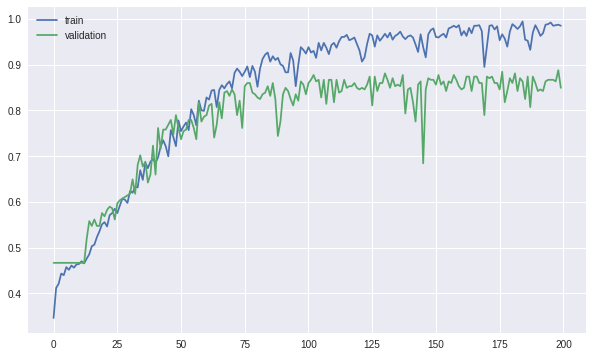

In [0]:
plt.figure(figsize=(10,6))
plt.plot(model_history.history["acc"])
plt.plot(model_history.history["val_acc"])
plt.legend(["train","validation"])

In [0]:
model.evaluate(x_ts,y_ts)

285/285 [==============================] - 0s 141us/step


[0.8871444221128497, 0.8491228055535701]

In [0]:
np.array(model_history.history["val_acc"][-15:]).mean()

0.8554385973277846

In [0]:
np.array(model_history.history["acc"][-15:]).mean()

0.974035084149991

### Convnet Part

In [0]:
x_tr,x_ts,y_tr,y_ts=train_test_split(face.data.reshape([1140,62,47,1]),
                                                            face.target)

In [0]:
x_tr=x_tr/255
x_ts=x_ts/255
y_tr=to_categorical(y_tr)
y_ts=to_categorical(y_ts)
y_ts.shape

(285, 5)

In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="elu",input_shape=(62,47,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512,activation="elu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5,activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 60, 45, 32)        320       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 30, 22, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 28, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 10, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 14, 10, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 12, 8, 128)        73856     
__________

In [0]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [0]:

train_history=model.fit(x_tr,y_tr,batch_size=64,epochs=120,
                        validation_data=(x_ts,y_ts))

Train on 855 samples, validate on 285 samples
Epoch 1/120
855/855 [==============================] - 3s 3ms/step - loss: 1.7587 - acc: 0.3696 - val_loss: 1.6038 - val_acc: 0.4246
Epoch 2/120
855/855 [==============================] - 1s 611us/step - loss: 1.4303 - acc: 0.4667 - val_loss: 1.6675 - val_acc: 0.1088
Epoch 3/120
855/855 [==============================] - 1s 593us/step - loss: 1.3752 - acc: 0.4713 - val_loss: 1.3634 - val_acc: 0.4702
Epoch 4/120
855/855 [==============================] - 0s 573us/step - loss: 1.3094 - acc: 0.4737 - val_loss: 1.2515 - val_acc: 0.5719
Epoch 5/120
855/855 [==============================] - 0s 552us/step - loss: 1.2051 - acc: 0.5263 - val_loss: 1.2166 - val_acc: 0.5579
Epoch 6/120
855/855 [==============================] - 0s 574us/step - loss: 1.0555 - acc: 0.6012 - val_loss: 1.0099 - val_acc: 0.6281
Epoch 7/120
855/855 [==============================] - 1s 598us/step - loss: 0.8803 - acc: 0.6749 - val_loss: 0.8822 - val_acc: 0.6877
Epoch 8/120

855/855 [==============================] - 0s 496us/step - loss: 0.4287 - acc: 0.8596 - val_loss: 0.4177 - val_acc: 0.8526
Epoch 14/120
855/855 [==============================] - 0s 481us/step - loss: 0.3797 - acc: 0.8749 - val_loss: 0.3942 - val_acc: 0.8561
Epoch 15/120
855/855 [==============================] - 0s 473us/step - loss: 0.3280 - acc: 0.8819 - val_loss: 0.3453 - val_acc: 0.8737
Epoch 16/120
855/855 [==============================] - 0s 466us/step - loss: 0.3162 - acc: 0.8994 - val_loss: 0.3891 - val_acc: 0.8351
Epoch 17/120
855/855 [==============================] - 0s 467us/step - loss: 0.2721 - acc: 0.9099 - val_loss: 0.3528 - val_acc: 0.8526
Epoch 18/120
855/855 [==============================] - 0s 470us/step - loss: 0.2314 - acc: 0.9333 - val_loss: 0.3279 - val_acc: 0.8912
Epoch 19/120
855/855 [==============================] - 0s 467us/step - loss: 0.2039 - acc: 0.9275 - val_loss: 0.3188 - val_acc: 0.8947
Epoch 20/120
855/855 [==============================] - 0s 45

855/855 [==============================] - 0s 440us/step - loss: 0.1054 - acc: 0.9673 - val_loss: 0.3121 - val_acc: 0.9123
Epoch 27/120
855/855 [==============================] - 0s 439us/step - loss: 0.0908 - acc: 0.9661 - val_loss: 0.3576 - val_acc: 0.9088
Epoch 28/120
855/855 [==============================] - 0s 448us/step - loss: 0.0813 - acc: 0.9696 - val_loss: 0.3982 - val_acc: 0.9193
Epoch 29/120
855/855 [==============================] - 0s 476us/step - loss: 0.0725 - acc: 0.9766 - val_loss: 0.3821 - val_acc: 0.9018
Epoch 30/120
855/855 [==============================] - 0s 526us/step - loss: 0.0571 - acc: 0.9754 - val_loss: 0.4200 - val_acc: 0.8947
Epoch 31/120
855/855 [==============================] - 0s 532us/step - loss: 0.0795 - acc: 0.9731 - val_loss: 0.3677 - val_acc: 0.9263
Epoch 32/120
855/855 [==============================] - 0s 560us/step - loss: 0.0542 - acc: 0.9848 - val_loss: 0.4102 - val_acc: 0.9158
Epoch 33/120
855/855 [==============================] - 0s 49

855/855 [==============================] - 0s 549us/step - loss: 0.0340 - acc: 0.9871 - val_loss: 0.4464 - val_acc: 0.9018
Epoch 40/120
855/855 [==============================] - 0s 526us/step - loss: 0.0268 - acc: 0.9942 - val_loss: 0.4041 - val_acc: 0.9158
Epoch 41/120
855/855 [==============================] - 0s 507us/step - loss: 0.0281 - acc: 0.9906 - val_loss: 0.4040 - val_acc: 0.9368
Epoch 42/120
855/855 [==============================] - 0s 469us/step - loss: 0.0195 - acc: 0.9942 - val_loss: 0.4715 - val_acc: 0.9158
Epoch 43/120
855/855 [==============================] - 0s 555us/step - loss: 0.0182 - acc: 0.9942 - val_loss: 0.4052 - val_acc: 0.9158
Epoch 44/120
855/855 [==============================] - 0s 514us/step - loss: 0.0159 - acc: 0.9953 - val_loss: 0.4682 - val_acc: 0.9158
Epoch 45/120
855/855 [==============================] - 0s 509us/step - loss: 0.0149 - acc: 0.9965 - val_loss: 0.4738 - val_acc: 0.9193
Epoch 46/120
855/855 [==============================] - 0s 54

855/855 [==============================] - 0s 529us/step - loss: 0.0178 - acc: 0.9965 - val_loss: 0.4542 - val_acc: 0.9088
Epoch 53/120
855/855 [==============================] - 0s 467us/step - loss: 0.0181 - acc: 0.9942 - val_loss: 0.5112 - val_acc: 0.8982
Epoch 54/120
855/855 [==============================] - 0s 530us/step - loss: 0.0306 - acc: 0.9871 - val_loss: 0.5169 - val_acc: 0.8912
Epoch 55/120
855/855 [==============================] - 0s 547us/step - loss: 0.0257 - acc: 0.9883 - val_loss: 0.4615 - val_acc: 0.9123
Epoch 56/120
855/855 [==============================] - 0s 474us/step - loss: 0.0332 - acc: 0.9930 - val_loss: 0.4314 - val_acc: 0.9053
Epoch 57/120
855/855 [==============================] - 0s 519us/step - loss: 0.0458 - acc: 0.9860 - val_loss: 0.5082 - val_acc: 0.9123
Epoch 58/120
855/855 [==============================] - 0s 546us/step - loss: 0.0853 - acc: 0.9684 - val_loss: 0.5983 - val_acc: 0.8807
Epoch 59/120
855/855 [==============================] - 0s 53

855/855 [==============================] - 0s 536us/step - loss: 0.0146 - acc: 0.9930 - val_loss: 0.5519 - val_acc: 0.8982
Epoch 66/120
855/855 [==============================] - 0s 506us/step - loss: 0.0149 - acc: 0.9942 - val_loss: 0.4498 - val_acc: 0.9263
Epoch 67/120
855/855 [==============================] - 0s 578us/step - loss: 0.0130 - acc: 0.9953 - val_loss: 0.4251 - val_acc: 0.9298
Epoch 68/120
855/855 [==============================] - 1s 589us/step - loss: 0.0123 - acc: 0.9930 - val_loss: 0.3811 - val_acc: 0.9368
Epoch 69/120
855/855 [==============================] - 0s 543us/step - loss: 0.0100 - acc: 0.9977 - val_loss: 0.5071 - val_acc: 0.9228
Epoch 70/120
855/855 [==============================] - 1s 648us/step - loss: 0.0129 - acc: 0.9965 - val_loss: 0.4149 - val_acc: 0.9263
Epoch 71/120
855/855 [==============================] - 1s 592us/step - loss: 0.0074 - acc: 0.9977 - val_loss: 0.4057 - val_acc: 0.9298
Epoch 72/120
855/855 [==============================] - 0s 51

855/855 [==============================] - 0s 540us/step - loss: 0.0135 - acc: 0.9942 - val_loss: 0.4975 - val_acc: 0.9298
Epoch 78/120
855/855 [==============================] - 1s 619us/step - loss: 0.0093 - acc: 0.9965 - val_loss: 0.5332 - val_acc: 0.9263
Epoch 79/120
855/855 [==============================] - 1s 653us/step - loss: 0.0158 - acc: 0.9942 - val_loss: 0.6115 - val_acc: 0.9123
Epoch 80/120
855/855 [==============================] - 1s 648us/step - loss: 0.0143 - acc: 0.9977 - val_loss: 0.4378 - val_acc: 0.9263
Epoch 81/120
855/855 [==============================] - 0s 513us/step - loss: 0.0078 - acc: 0.9988 - val_loss: 0.4625 - val_acc: 0.9228
Epoch 82/120
855/855 [==============================] - 1s 630us/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.4586 - val_acc: 0.9228
Epoch 83/120
855/855 [==============================] - 1s 768us/step - loss: 0.0058 - acc: 0.9988 - val_loss: 0.4932 - val_acc: 0.9193
Epoch 84/120
855/855 [==============================] - 1s 67

855/855 [==============================] - 1s 801us/step - loss: 0.0127 - acc: 0.9953 - val_loss: 0.4667 - val_acc: 0.9263
Epoch 89/120
855/855 [==============================] - 1s 770us/step - loss: 0.0305 - acc: 0.9895 - val_loss: 0.5074 - val_acc: 0.9298
Epoch 90/120
855/855 [==============================] - 1s 729us/step - loss: 0.0239 - acc: 0.9906 - val_loss: 0.5629 - val_acc: 0.9158
Epoch 91/120
855/855 [==============================] - 1s 749us/step - loss: 0.0189 - acc: 0.9930 - val_loss: 0.4556 - val_acc: 0.9158
Epoch 92/120
855/855 [==============================] - 1s 796us/step - loss: 0.0204 - acc: 0.9918 - val_loss: 0.4694 - val_acc: 0.9263
Epoch 93/120
855/855 [==============================] - 1s 867us/step - loss: 0.0211 - acc: 0.9930 - val_loss: 0.5226 - val_acc: 0.9123
Epoch 94/120
855/855 [==============================] - 1s 872us/step - loss: 0.0302 - acc: 0.9895 - val_loss: 0.4855 - val_acc: 0.9193
Epoch 95/120
855/855 [==============================] - 1s 87

855/855 [==============================] - 1s 916us/step - loss: 0.0093 - acc: 0.9965 - val_loss: 0.5578 - val_acc: 0.9158
Epoch 100/120
855/855 [==============================] - 1s 890us/step - loss: 0.0106 - acc: 0.9977 - val_loss: 0.4623 - val_acc: 0.9298
Epoch 101/120
855/855 [==============================] - 1s 915us/step - loss: 0.0103 - acc: 0.9965 - val_loss: 0.6991 - val_acc: 0.9193
Epoch 102/120
855/855 [==============================] - 1s 862us/step - loss: 0.0257 - acc: 0.9906 - val_loss: 0.4635 - val_acc: 0.9404
Epoch 103/120
855/855 [==============================] - 1s 898us/step - loss: 0.0217 - acc: 0.9942 - val_loss: 0.6436 - val_acc: 0.9263
Epoch 104/120
855/855 [==============================] - 1s 936us/step - loss: 0.0215 - acc: 0.9906 - val_loss: 0.5540 - val_acc: 0.9228
Epoch 105/120
855/855 [==============================] - 1s 886us/step - loss: 0.0179 - acc: 0.9930 - val_loss: 0.7238 - val_acc: 0.9088
Epoch 106/120
855/855 [==============================] 

855/855 [==============================] - 1s 833us/step - loss: 0.0092 - acc: 0.9953 - val_loss: 0.4438 - val_acc: 0.9298
Epoch 111/120
855/855 [==============================] - 1s 894us/step - loss: 0.0237 - acc: 0.9918 - val_loss: 0.4814 - val_acc: 0.9333
Epoch 112/120
855/855 [==============================] - 1s 980us/step - loss: 0.0145 - acc: 0.9942 - val_loss: 0.4787 - val_acc: 0.9158
Epoch 113/120
855/855 [==============================] - 1s 820us/step - loss: 0.0615 - acc: 0.9813 - val_loss: 0.5423 - val_acc: 0.9018
Epoch 114/120
855/855 [==============================] - 1s 966us/step - loss: 0.0306 - acc: 0.9906 - val_loss: 0.5463 - val_acc: 0.9263
Epoch 115/120
855/855 [==============================] - 1s 960us/step - loss: 0.0334 - acc: 0.9942 - val_loss: 0.6721 - val_acc: 0.9088
Epoch 116/120
855/855 [==============================] - 1s 890us/step - loss: 0.0550 - acc: 0.9848 - val_loss: 0.5491 - val_acc: 0.9298
Epoch 117/120
855/855 [==============================] 

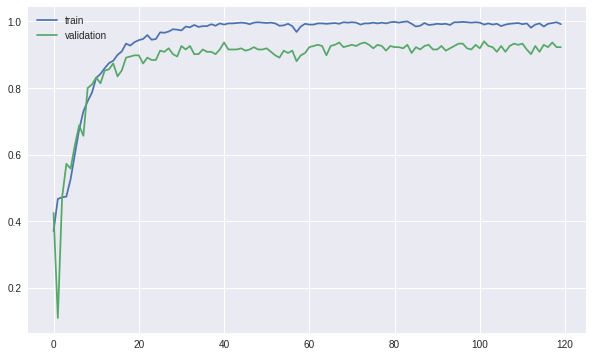

In [0]:
plt.figure(figsize=(10,6))
plt.plot(train_history.history["acc"])
plt.plot(train_history.history["val_acc"])
plt.legend(["train","validation"])

In [0]:
model.evaluate(x_ts,y_ts)

285/285 [==============================] - 0s 341us/step


[0.4980155258586532, 0.922807020262668]

In [0]:
np.array(train_history.history["val_acc"][-15:]).mean()

0.9230409369552345

In [0]:
np.array(train_history.history["acc"][-15:]).mean()

0.9915789474241914

### With Data Augmentation

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
x=face.data.reshape((1140,62,47,1))
y=to_categorical(face.target)
y.shape

(1140, 5)

In [0]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y)
train_datagen.fit(x_tr)
test_datagen.fit(x_ts)

In [0]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="elu",input_shape=(62,47,1),border_mode="same"))
model.add(layers.Conv2D(32,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64,(3,3),activation="elu",border_mode="same"))
model.add(layers.Conv2D(64,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128,(3,3),activation="elu",border_mode="same"))
model.add(layers.Conv2D(128,(3,3),activation="elu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(192,(3,3),activation="elu",border_mode="same"))
model.add(layers.Conv2D(192,(3,3),activation="elu"))

model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512,activation="elu"))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="elu", input_shape=(62, 47, 1..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="elu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), activation="elu", padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 62, 47, 32)        320       
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 60, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 30, 22, 32)        0         
_________________________________________________________________
dropout_190 (Dropout)        (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 30, 22, 64)        18496     
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 28, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 14, 10, 64)        0         
__________

In [0]:
aug_history = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=250,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)

Epoch 1/250
27/26 [==============================] - 9s 338ms/step - loss: 1.7689 - acc: 0.3721 - val_loss: 1.4193 - val_acc: 0.4491
Epoch 2/250
27/26 [==============================] - 2s 58ms/step - loss: 1.4530 - acc: 0.4506 - val_loss: 1.4168 - val_acc: 0.4491
Epoch 3/250
27/26 [==============================] - 1s 54ms/step - loss: 1.4203 - acc: 0.4681 - val_loss: 1.3987 - val_acc: 0.4491
Epoch 4/250
27/26 [==============================] - 1s 51ms/step - loss: 1.3844 - acc: 0.4720 - val_loss: 1.2585 - val_acc: 0.4772
Epoch 5/250
27/26 [==============================] - 1s 53ms/step - loss: 1.3083 - acc: 0.4837 - val_loss: 1.2410 - val_acc: 0.4737
Epoch 6/250
27/26 [==============================] - 1s 52ms/step - loss: 1.2427 - acc: 0.4941 - val_loss: 1.0882 - val_acc: 0.5965
Epoch 7/250
27/26 [==============================] - 1s 52ms/step - loss: 1.1381 - acc: 0.5645 - val_loss: 1.0269 - val_acc: 0.6421
Epoch 8/250
27/26 [==============================] - 1s 51ms/step - loss: 1

27/26 [==============================] - 1s 53ms/step - loss: 0.9840 - acc: 0.6476 - val_loss: 0.7198 - val_acc: 0.7228
Epoch 10/250
27/26 [==============================] - 1s 53ms/step - loss: 0.8473 - acc: 0.6832 - val_loss: 0.5026 - val_acc: 0.8386
Epoch 11/250
27/26 [==============================] - 1s 52ms/step - loss: 0.8073 - acc: 0.7195 - val_loss: 0.6885 - val_acc: 0.7684
Epoch 12/250
27/26 [==============================] - 1s 52ms/step - loss: 0.8106 - acc: 0.7295 - val_loss: 0.5139 - val_acc: 0.8000
Epoch 13/250
27/26 [==============================] - 1s 51ms/step - loss: 0.6857 - acc: 0.7516 - val_loss: 0.4810 - val_acc: 0.8211
Epoch 14/250
27/26 [==============================] - 1s 52ms/step - loss: 0.7217 - acc: 0.7350 - val_loss: 0.5008 - val_acc: 0.8351
Epoch 15/250
27/26 [==============================] - 1s 49ms/step - loss: 0.6490 - acc: 0.7623 - val_loss: 0.4804 - val_acc: 0.8281
Epoch 16/250
27/26 [==============================] - 1s 51ms/step - loss: 0.6123 

27/26 [==============================] - 1s 48ms/step - loss: 0.6489 - acc: 0.7600 - val_loss: 0.4074 - val_acc: 0.8456
Epoch 19/250
27/26 [==============================] - 1s 49ms/step - loss: 0.5521 - acc: 0.8052 - val_loss: 0.3178 - val_acc: 0.8772
Epoch 20/250
27/26 [==============================] - 1s 49ms/step - loss: 0.5692 - acc: 0.7979 - val_loss: 0.3777 - val_acc: 0.8632
Epoch 21/250
27/26 [==============================] - 1s 50ms/step - loss: 0.5422 - acc: 0.8134 - val_loss: 0.3909 - val_acc: 0.8561
Epoch 22/250
27/26 [==============================] - 1s 49ms/step - loss: 0.5166 - acc: 0.8197 - val_loss: 0.2941 - val_acc: 0.9018
Epoch 23/250
27/26 [==============================] - 1s 49ms/step - loss: 0.4661 - acc: 0.8419 - val_loss: 0.2362 - val_acc: 0.9158
Epoch 24/250
27/26 [==============================] - 1s 51ms/step - loss: 0.3899 - acc: 0.8634 - val_loss: 0.3708 - val_acc: 0.8842
Epoch 25/250
27/26 [==============================] - 1s 50ms/step - loss: 0.4820 

27/26 [==============================] - 1s 48ms/step - loss: 0.4230 - acc: 0.8443 - val_loss: 0.2548 - val_acc: 0.9158
Epoch 28/250
27/26 [==============================] - 1s 48ms/step - loss: 0.3877 - acc: 0.8526 - val_loss: 0.1955 - val_acc: 0.9439
Epoch 29/250
27/26 [==============================] - 1s 48ms/step - loss: 0.3615 - acc: 0.8861 - val_loss: 0.2428 - val_acc: 0.9053
Epoch 30/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3255 - acc: 0.8825 - val_loss: 0.2608 - val_acc: 0.9158
Epoch 31/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3432 - acc: 0.8899 - val_loss: 0.2128 - val_acc: 0.9228
Epoch 32/250
27/26 [==============================] - 1s 49ms/step - loss: 0.2901 - acc: 0.8899 - val_loss: 0.2063 - val_acc: 0.9298
Epoch 33/250
27/26 [==============================] - 1s 48ms/step - loss: 0.3416 - acc: 0.8757 - val_loss: 0.3113 - val_acc: 0.9088
Epoch 34/250
27/26 [==============================] - 1s 49ms/step - loss: 0.3208 

27/26 [==============================] - 1s 48ms/step - loss: 0.3210 - acc: 0.8940 - val_loss: 0.2208 - val_acc: 0.9474
Epoch 37/250
27/26 [==============================] - 1s 47ms/step - loss: 0.4444 - acc: 0.8689 - val_loss: 0.2904 - val_acc: 0.9298
Epoch 38/250
27/26 [==============================] - 1s 48ms/step - loss: 0.3425 - acc: 0.8961 - val_loss: 0.2013 - val_acc: 0.9439
Epoch 39/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2522 - acc: 0.9134 - val_loss: 0.3487 - val_acc: 0.8912
Epoch 40/250
27/26 [==============================] - 1s 48ms/step - loss: 0.3001 - acc: 0.8952 - val_loss: 0.2895 - val_acc: 0.9123
Epoch 41/250
27/26 [==============================] - 1s 47ms/step - loss: 0.3531 - acc: 0.8813 - val_loss: 0.2087 - val_acc: 0.9263
Epoch 42/250
27/26 [==============================] - 1s 46ms/step - loss: 0.3522 - acc: 0.8752 - val_loss: 0.1724 - val_acc: 0.9368
Epoch 43/250
27/26 [==============================] - 1s 44ms/step - loss: 0.2837 

27/26 [==============================] - 1s 47ms/step - loss: 0.2434 - acc: 0.9065 - val_loss: 0.2547 - val_acc: 0.9263
Epoch 46/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2160 - acc: 0.9297 - val_loss: 0.1482 - val_acc: 0.9649
Epoch 47/250
27/26 [==============================] - 1s 48ms/step - loss: 0.2359 - acc: 0.9200 - val_loss: 0.3645 - val_acc: 0.9158
Epoch 48/250
27/26 [==============================] - 1s 46ms/step - loss: 0.3322 - acc: 0.8875 - val_loss: 0.2999 - val_acc: 0.9193
Epoch 49/250
27/26 [==============================] - 1s 48ms/step - loss: 0.3095 - acc: 0.8977 - val_loss: 0.1553 - val_acc: 0.9509
Epoch 50/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2244 - acc: 0.9250 - val_loss: 0.0693 - val_acc: 0.9789
Epoch 51/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1550 - acc: 0.9544 - val_loss: 0.2387 - val_acc: 0.9368
Epoch 52/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2197 

27/26 [==============================] - 1s 46ms/step - loss: 0.1662 - acc: 0.9491 - val_loss: 0.1679 - val_acc: 0.9404
Epoch 55/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2659 - acc: 0.9039 - val_loss: 0.2223 - val_acc: 0.9544
Epoch 56/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2022 - acc: 0.9394 - val_loss: 0.1390 - val_acc: 0.9474
Epoch 57/250
27/26 [==============================] - 1s 45ms/step - loss: 0.2540 - acc: 0.9259 - val_loss: 0.1432 - val_acc: 0.9649
Epoch 58/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1839 - acc: 0.9412 - val_loss: 0.1119 - val_acc: 0.9649
Epoch 59/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1900 - acc: 0.9382 - val_loss: 0.0978 - val_acc: 0.9719
Epoch 60/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1822 - acc: 0.9443 - val_loss: 0.2214 - val_acc: 0.9088
Epoch 61/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1298 

27/26 [==============================] - 1s 47ms/step - loss: 0.1936 - acc: 0.9331 - val_loss: 0.1533 - val_acc: 0.9614
Epoch 64/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1610 - acc: 0.9394 - val_loss: 0.4862 - val_acc: 0.9193
Epoch 65/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2214 - acc: 0.9359 - val_loss: 0.2152 - val_acc: 0.9579
Epoch 66/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1811 - acc: 0.9410 - val_loss: 0.2503 - val_acc: 0.9404
Epoch 67/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1316 - acc: 0.9547 - val_loss: 0.1134 - val_acc: 0.9614
Epoch 68/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1328 - acc: 0.9618 - val_loss: 0.1991 - val_acc: 0.9579
Epoch 69/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1485 - acc: 0.9491 - val_loss: 0.0819 - val_acc: 0.9754
Epoch 70/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1152 

27/26 [==============================] - 1s 46ms/step - loss: 0.1899 - acc: 0.9440 - val_loss: 0.1134 - val_acc: 0.9684
Epoch 73/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1129 - acc: 0.9695 - val_loss: 0.1375 - val_acc: 0.9719
Epoch 74/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1219 - acc: 0.9671 - val_loss: 0.3370 - val_acc: 0.9439
Epoch 75/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1129 - acc: 0.9722 - val_loss: 0.2429 - val_acc: 0.9439
Epoch 76/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1120 - acc: 0.9595 - val_loss: 0.1497 - val_acc: 0.9579
Epoch 77/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1136 - acc: 0.9625 - val_loss: 0.0984 - val_acc: 0.9684
Epoch 78/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1335 - acc: 0.9517 - val_loss: 0.0713 - val_acc: 0.9825
Epoch 79/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1691 

27/26 [==============================] - 1s 46ms/step - loss: 0.1532 - acc: 0.9563 - val_loss: 0.3111 - val_acc: 0.9333
Epoch 82/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1310 - acc: 0.9655 - val_loss: 0.1103 - val_acc: 0.9754
Epoch 83/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2053 - acc: 0.9467 - val_loss: 0.1003 - val_acc: 0.9789
Epoch 84/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1297 - acc: 0.9572 - val_loss: 0.0558 - val_acc: 0.9825
Epoch 85/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1558 - acc: 0.9444 - val_loss: 0.1181 - val_acc: 0.9684
Epoch 86/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1963 - acc: 0.9447 - val_loss: 0.0618 - val_acc: 0.9719
Epoch 87/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1050 - acc: 0.9618 - val_loss: 0.1114 - val_acc: 0.9825
Epoch 88/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0928 

27/26 [==============================] - 1s 46ms/step - loss: 0.1740 - acc: 0.9521 - val_loss: 0.0797 - val_acc: 0.9719
Epoch 91/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1003 - acc: 0.9641 - val_loss: 0.1083 - val_acc: 0.9825
Epoch 92/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0932 - acc: 0.9734 - val_loss: 0.0506 - val_acc: 0.9860
Epoch 93/250
27/26 [==============================] - 1s 48ms/step - loss: 0.0975 - acc: 0.9690 - val_loss: 0.0848 - val_acc: 0.9825
Epoch 94/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0882 - acc: 0.9815 - val_loss: 0.1066 - val_acc: 0.9825
Epoch 95/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1040 - acc: 0.9653 - val_loss: 0.2093 - val_acc: 0.9754
Epoch 96/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1566 - acc: 0.9498 - val_loss: 0.0838 - val_acc: 0.9754
Epoch 97/250
27/26 [==============================] - 1s 45ms/step - loss: 0.1772 

27/26 [==============================] - 1s 46ms/step - loss: 0.1066 - acc: 0.9725 - val_loss: 0.2668 - val_acc: 0.9474
Epoch 100/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1516 - acc: 0.9632 - val_loss: 0.0634 - val_acc: 0.9825
Epoch 101/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0882 - acc: 0.9745 - val_loss: 0.3942 - val_acc: 0.9579
Epoch 102/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0778 - acc: 0.9745 - val_loss: 0.0998 - val_acc: 0.9789
Epoch 103/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1094 - acc: 0.9687 - val_loss: 0.0465 - val_acc: 0.9895
Epoch 104/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0894 - acc: 0.9799 - val_loss: 0.1387 - val_acc: 0.9684
Epoch 105/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0398 - acc: 0.9815 - val_loss: 0.0605 - val_acc: 0.9825
Epoch 106/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.0851 - acc: 0.9667 - val_loss: 0.1170 - val_acc: 0.9719
Epoch 109/250
27/26 [==============================] - 1s 45ms/step - loss: 0.1334 - acc: 0.9614 - val_loss: 0.2446 - val_acc: 0.9719
Epoch 110/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2068 - acc: 0.9424 - val_loss: 0.0429 - val_acc: 0.9789
Epoch 111/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1683 - acc: 0.9482 - val_loss: 0.2031 - val_acc: 0.9684
Epoch 112/250
27/26 [==============================] - 1s 48ms/step - loss: 0.1864 - acc: 0.9456 - val_loss: 0.2193 - val_acc: 0.9544
Epoch 113/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1546 - acc: 0.9548 - val_loss: 0.1024 - val_acc: 0.9789
Epoch 114/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0906 - acc: 0.9695 - val_loss: 0.1744 - val_acc: 0.9754
Epoch 115/250
27/26 [==============================] - 1s 45ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.1281 - acc: 0.9695 - val_loss: 0.0837 - val_acc: 0.9754
Epoch 118/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1017 - acc: 0.9729 - val_loss: 0.0895 - val_acc: 0.9719
Epoch 119/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1023 - acc: 0.9655 - val_loss: 0.1246 - val_acc: 0.9684
Epoch 120/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1092 - acc: 0.9702 - val_loss: 0.0792 - val_acc: 0.9825
Epoch 121/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0879 - acc: 0.9695 - val_loss: 0.0378 - val_acc: 0.9789
Epoch 122/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0630 - acc: 0.9792 - val_loss: 0.0072 - val_acc: 0.9965
Epoch 123/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0623 - acc: 0.9806 - val_loss: 0.0712 - val_acc: 0.9789
Epoch 124/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.1623 - acc: 0.9582 - val_loss: 0.1093 - val_acc: 0.9684
Epoch 127/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1580 - acc: 0.9579 - val_loss: 0.1058 - val_acc: 0.9614
Epoch 128/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1150 - acc: 0.9609 - val_loss: 0.0328 - val_acc: 0.9860
Epoch 129/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0763 - acc: 0.9799 - val_loss: 0.0772 - val_acc: 0.9754
Epoch 130/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0982 - acc: 0.9752 - val_loss: 0.0881 - val_acc: 0.9825
Epoch 131/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0678 - acc: 0.9780 - val_loss: 0.1629 - val_acc: 0.9649
Epoch 132/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0713 - acc: 0.9787 - val_loss: 0.0537 - val_acc: 0.9789
Epoch 133/250
27/26 [==============================] - 1s 45ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.0562 - acc: 0.9861 - val_loss: 0.0882 - val_acc: 0.9754
Epoch 136/250
27/26 [==============================] - 1s 48ms/step - loss: 0.1282 - acc: 0.9706 - val_loss: 0.1573 - val_acc: 0.9579
Epoch 137/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2214 - acc: 0.9421 - val_loss: 0.1122 - val_acc: 0.9579
Epoch 138/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1611 - acc: 0.9491 - val_loss: 0.0743 - val_acc: 0.9825
Epoch 139/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0894 - acc: 0.9768 - val_loss: 0.1175 - val_acc: 0.9789
Epoch 140/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1296 - acc: 0.9602 - val_loss: 0.1091 - val_acc: 0.9544
Epoch 141/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1100 - acc: 0.9734 - val_loss: 0.0400 - val_acc: 0.9930
Epoch 142/250
27/26 [==============================] - 1s 45ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.1017 - acc: 0.9748 - val_loss: 0.0276 - val_acc: 0.9895
Epoch 145/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1194 - acc: 0.9602 - val_loss: 0.0500 - val_acc: 0.9895
Epoch 146/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0572 - acc: 0.9873 - val_loss: 0.0964 - val_acc: 0.9719
Epoch 147/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0908 - acc: 0.9764 - val_loss: 0.0359 - val_acc: 0.9860
Epoch 148/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0836 - acc: 0.9780 - val_loss: 0.0692 - val_acc: 0.9860
Epoch 149/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0450 - acc: 0.9861 - val_loss: 0.0302 - val_acc: 0.9895
Epoch 150/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0361 - acc: 0.9896 - val_loss: 0.1132 - val_acc: 0.9754
Epoch 151/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.0718 - acc: 0.9729 - val_loss: 0.0978 - val_acc: 0.9719
Epoch 154/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0344 - acc: 0.9873 - val_loss: 0.1618 - val_acc: 0.9754
Epoch 155/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0441 - acc: 0.9884 - val_loss: 0.2037 - val_acc: 0.9754
Epoch 156/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0725 - acc: 0.9845 - val_loss: 0.1357 - val_acc: 0.9684
Epoch 157/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1236 - acc: 0.9690 - val_loss: 0.1379 - val_acc: 0.9754
Epoch 158/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1286 - acc: 0.9674 - val_loss: 0.0622 - val_acc: 0.9789
Epoch 159/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1811 - acc: 0.9433 - val_loss: 0.1640 - val_acc: 0.9649
Epoch 160/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 45ms/step - loss: 0.0898 - acc: 0.9706 - val_loss: 0.1656 - val_acc: 0.9754
Epoch 163/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2946 - acc: 0.9405 - val_loss: 0.1436 - val_acc: 0.9754
Epoch 164/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1311 - acc: 0.9664 - val_loss: 0.1621 - val_acc: 0.9754
Epoch 165/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2016 - acc: 0.9491 - val_loss: 0.0861 - val_acc: 0.9719
Epoch 166/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0757 - acc: 0.9706 - val_loss: 0.1602 - val_acc: 0.9719
Epoch 167/250
27/26 [==============================] - 1s 48ms/step - loss: 0.2093 - acc: 0.9644 - val_loss: 0.1544 - val_acc: 0.9719
Epoch 168/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1383 - acc: 0.9572 - val_loss: 0.1068 - val_acc: 0.9754
Epoch 169/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.1343 - acc: 0.9664 - val_loss: 0.2711 - val_acc: 0.9684
Epoch 172/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1169 - acc: 0.9725 - val_loss: 0.1981 - val_acc: 0.9649
Epoch 173/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0692 - acc: 0.9729 - val_loss: 0.2350 - val_acc: 0.9649
Epoch 174/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0625 - acc: 0.9787 - val_loss: 0.0744 - val_acc: 0.9825
Epoch 175/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0620 - acc: 0.9845 - val_loss: 0.1474 - val_acc: 0.9825
Epoch 176/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0414 - acc: 0.9873 - val_loss: 0.1655 - val_acc: 0.9719
Epoch 177/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0780 - acc: 0.9873 - val_loss: 0.3275 - val_acc: 0.9544
Epoch 178/250
27/26 [==============================] - 1s 45ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.0922 - acc: 0.9734 - val_loss: 0.1445 - val_acc: 0.9789
Epoch 181/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0833 - acc: 0.9768 - val_loss: 0.1597 - val_acc: 0.9719
Epoch 182/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0650 - acc: 0.9826 - val_loss: 0.1513 - val_acc: 0.9754
Epoch 183/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0661 - acc: 0.9834 - val_loss: 0.2705 - val_acc: 0.9649
Epoch 184/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0510 - acc: 0.9884 - val_loss: 0.1651 - val_acc: 0.9754
Epoch 185/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1786 - acc: 0.9641 - val_loss: 0.1773 - val_acc: 0.9719
Epoch 186/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0997 - acc: 0.9780 - val_loss: 0.1019 - val_acc: 0.9860
Epoch 187/250
27/26 [==============================] - 1s 47ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.2056 - acc: 0.9412 - val_loss: 0.2113 - val_acc: 0.9614
Epoch 190/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2401 - acc: 0.9498 - val_loss: 0.0829 - val_acc: 0.9719
Epoch 191/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1640 - acc: 0.9595 - val_loss: 0.2107 - val_acc: 0.9649
Epoch 192/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0836 - acc: 0.9722 - val_loss: 0.0641 - val_acc: 0.9825
Epoch 193/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1040 - acc: 0.9745 - val_loss: 0.0658 - val_acc: 0.9895
Epoch 194/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0649 - acc: 0.9803 - val_loss: 0.1267 - val_acc: 0.9789
Epoch 195/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0867 - acc: 0.9815 - val_loss: 0.0824 - val_acc: 0.9860
Epoch 196/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.0536 - acc: 0.9771 - val_loss: 0.1330 - val_acc: 0.9860
Epoch 199/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1203 - acc: 0.9799 - val_loss: 0.0919 - val_acc: 0.9860
Epoch 200/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1254 - acc: 0.9683 - val_loss: 0.0503 - val_acc: 0.9860
Epoch 201/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0685 - acc: 0.9787 - val_loss: 0.0446 - val_acc: 0.9825
Epoch 202/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0440 - acc: 0.9849 - val_loss: 0.0940 - val_acc: 0.9860
Epoch 203/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0591 - acc: 0.9826 - val_loss: 0.0678 - val_acc: 0.9930
Epoch 204/250
27/26 [==============================] - 1s 48ms/step - loss: 0.0420 - acc: 0.9926 - val_loss: 0.0371 - val_acc: 0.9895
Epoch 205/250
27/26 [==============================] - 1s 45ms/step - loss: 

27/26 [==============================] - 1s 46ms/step - loss: 0.0566 - acc: 0.9803 - val_loss: 0.1480 - val_acc: 0.9719
Epoch 208/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0727 - acc: 0.9838 - val_loss: 0.0804 - val_acc: 0.9860
Epoch 209/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0564 - acc: 0.9803 - val_loss: 0.1038 - val_acc: 0.9789
Epoch 210/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0371 - acc: 0.9907 - val_loss: 0.0745 - val_acc: 0.9860
Epoch 211/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0453 - acc: 0.9861 - val_loss: 0.1203 - val_acc: 0.9754
Epoch 212/250
27/26 [==============================] - 1s 48ms/step - loss: 0.0481 - acc: 0.9873 - val_loss: 0.1121 - val_acc: 0.9825
Epoch 213/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0207 - acc: 0.9907 - val_loss: 0.1234 - val_acc: 0.9789
Epoch 214/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.0291 - acc: 0.9919 - val_loss: 0.0927 - val_acc: 0.9860
Epoch 217/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0422 - acc: 0.9884 - val_loss: 0.1279 - val_acc: 0.9754
Epoch 218/250
27/26 [==============================] - 1s 47ms/step - loss: 0.0250 - acc: 0.9926 - val_loss: 0.1489 - val_acc: 0.9789
Epoch 219/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0386 - acc: 0.9891 - val_loss: 0.1018 - val_acc: 0.9860
Epoch 220/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0321 - acc: 0.9884 - val_loss: 0.0968 - val_acc: 0.9825
Epoch 221/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0371 - acc: 0.9919 - val_loss: 0.0730 - val_acc: 0.9825
Epoch 222/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0380 - acc: 0.9903 - val_loss: 0.1189 - val_acc: 0.9754
Epoch 223/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 45ms/step - loss: 0.0351 - acc: 0.9919 - val_loss: 0.0868 - val_acc: 0.9860
Epoch 226/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0562 - acc: 0.9873 - val_loss: 0.1397 - val_acc: 0.9754
Epoch 227/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1173 - acc: 0.9702 - val_loss: 0.2966 - val_acc: 0.9684
Epoch 228/250
27/26 [==============================] - 1s 45ms/step - loss: 0.1333 - acc: 0.9699 - val_loss: 0.2853 - val_acc: 0.9509
Epoch 229/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2222 - acc: 0.9508 - val_loss: 0.1005 - val_acc: 0.9860
Epoch 230/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1945 - acc: 0.9551 - val_loss: 0.1767 - val_acc: 0.9649
Epoch 231/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0990 - acc: 0.9722 - val_loss: 0.1223 - val_acc: 0.9719
Epoch 232/250
27/26 [==============================] - 1s 48ms/step - loss: 

27/26 [==============================] - 1s 45ms/step - loss: 0.0603 - acc: 0.9919 - val_loss: 0.0901 - val_acc: 0.9825
Epoch 235/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0478 - acc: 0.9861 - val_loss: 0.0962 - val_acc: 0.9825
Epoch 236/250
27/26 [==============================] - 1s 45ms/step - loss: 0.1751 - acc: 0.9687 - val_loss: 0.1321 - val_acc: 0.9825
Epoch 237/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1212 - acc: 0.9702 - val_loss: 0.1604 - val_acc: 0.9789
Epoch 238/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0778 - acc: 0.9787 - val_loss: 0.1842 - val_acc: 0.9754
Epoch 239/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0529 - acc: 0.9838 - val_loss: 0.1187 - val_acc: 0.9825
Epoch 240/250
27/26 [==============================] - 1s 45ms/step - loss: 0.0549 - acc: 0.9861 - val_loss: 0.1406 - val_acc: 0.9789
Epoch 241/250
27/26 [==============================] - 1s 46ms/step - loss: 

27/26 [==============================] - 1s 47ms/step - loss: 0.1416 - acc: 0.9679 - val_loss: 0.3678 - val_acc: 0.9579
Epoch 244/250
27/26 [==============================] - 1s 46ms/step - loss: 0.2597 - acc: 0.9451 - val_loss: 0.0534 - val_acc: 0.9825
Epoch 245/250
27/26 [==============================] - 1s 46ms/step - loss: 0.1296 - acc: 0.9625 - val_loss: 0.0613 - val_acc: 0.9860
Epoch 246/250
27/26 [==============================] - 1s 47ms/step - loss: 0.1330 - acc: 0.9745 - val_loss: 0.1074 - val_acc: 0.9825
Epoch 247/250
27/26 [==============================] - 1s 47ms/step - loss: 0.2415 - acc: 0.9551 - val_loss: 0.1391 - val_acc: 0.9789
Epoch 248/250
27/26 [==============================] - 1s 45ms/step - loss: 0.1532 - acc: 0.9679 - val_loss: 0.1379 - val_acc: 0.9825
Epoch 249/250
27/26 [==============================] - 1s 46ms/step - loss: 0.0928 - acc: 0.9768 - val_loss: 0.1511 - val_acc: 0.9719
Epoch 250/250
27/26 [==============================] - 1s 47ms/step - loss: 

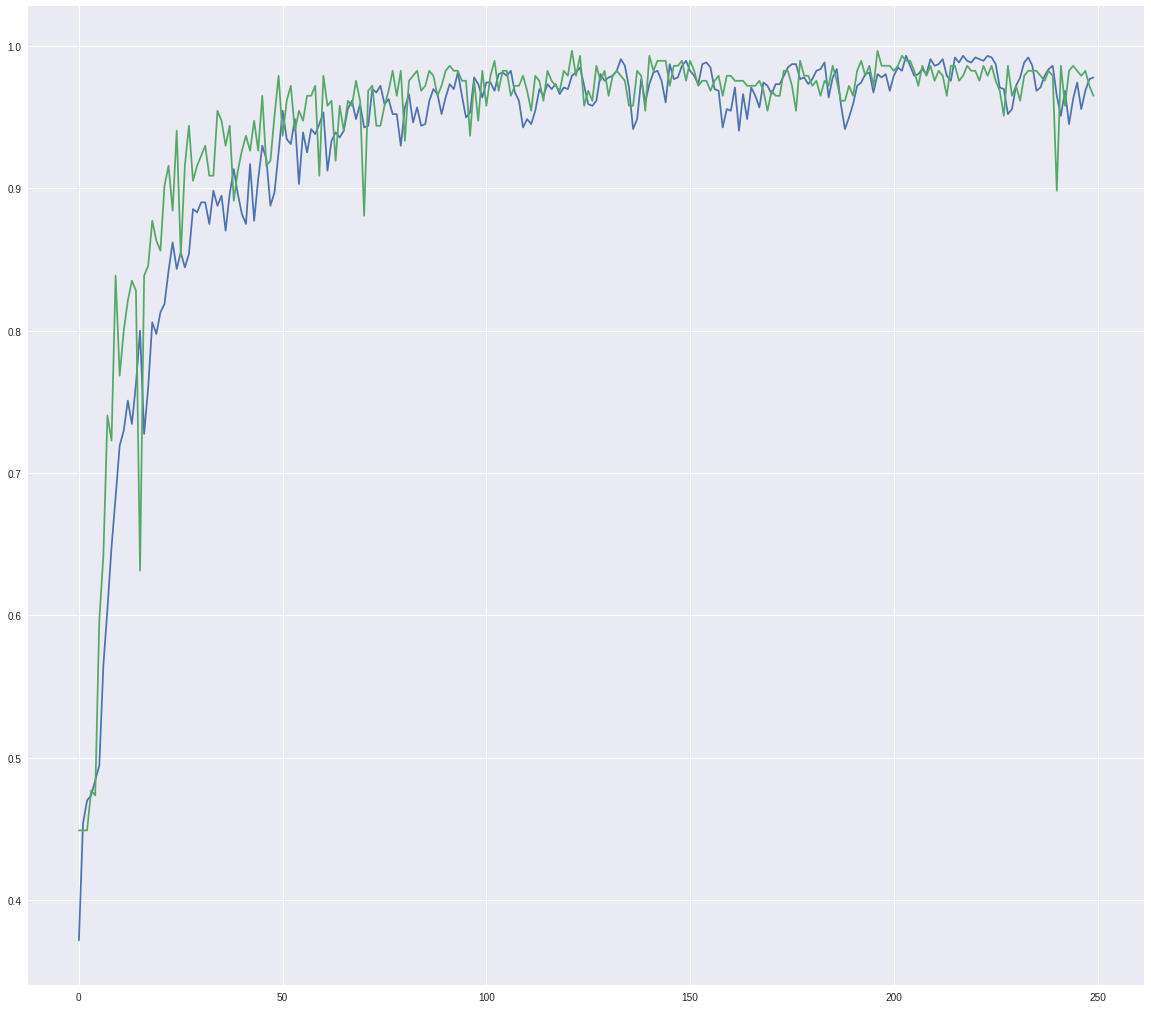

In [0]:
plt.figure(figsize=(20,18))
plt.plot(aug_history.history["acc"])
plt.plot(aug_history.history["val_acc"])

In [0]:
model.evaluate(x_ts/255,y_ts)

285/285 [==============================] - 0s 426us/step


[0.1686965919377511, 0.9649122830022845]

In [0]:
print("val accuracy average last 15 results :",np.array(aug_history.history["val_acc"][-15:]).mean())
print("val standard deviation last 15 results :",np.array(aug_history.history["val_acc"][-15:]).std())
print("train accuracy average last 15 results :",np.array(aug_history.history["acc"][-15:]).mean())
print("train standard deviation last 15 results :",np.array(aug_history.history["acc"][-15:]).std())

val accuracy average last 15 results : 0.9726315776925337
val standard deviation last 15 results : 0.02125439405742769
train accuracy average last 15 results : 0.9688109163001731
train standard deviation last 15 results : 0.011280471143743937


In [0]:
!ls

datalab


## Advanced Models


###  SimpleNet 

**Reference:**
  - Lets keep it simple, Using simple architectures to outperform deeper and more complex architectures:https://arxiv.org/abs/1608.06037
  - https://github.com/EricAlcaide/SimpleNet-Keras
  - https://github.com/Coderx7/SimpleNet

In [0]:
import keras 
import numpy as np
import keras.backend as K
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model 
from keras import regularizers,optimizers
from keras.layers import Conv2D,MaxPooling2D
from keras.initializers import glorot_normal,RandomNormal,Zeros
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Activation,Dropout,BatchNormalization

In [0]:
def create_model(s = 2, weight_decay = 1e-2,act="relu",num_classes=5):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3,3), padding='same', kernel_initializer=glorot_normal(), input_shape=x_tr.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))
    
    # Block 2
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.25))
    
    # Block 3
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))
    
    # Block 4
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    # First Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(Dropout(0.2))
    
    
    # Block 5
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))
    
    # Block 6
    model.add(Conv2D(128, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.25))
    
    # Block 7
    model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=glorot_normal()))
    # Second Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.25))
    
    
    # Block 8
    model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))
    
    # Block 9
    model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.25))
    # Third Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    
    
    # Block 10
    model.add(Conv2D(512, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.3))

    # Block 11  
    model.add(Conv2D(2048, (1,1), padding='same', kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    model.add(Dropout(0.25))
    
    # Block 12  
    model.add(Conv2D(256, (1,1), padding='same', kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    # Fourth Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))
    model.add(Dropout(0.3))


    # Block 13
    model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=glorot_normal()))
    model.add(Activation(act))
    # Fifth Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=s))

    # Final Classifier
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    
    #print(model.summary())

    return model

In [104]:
model=create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 62, 47, 64)        640       
_________________________________________________________________
batch_normalization_31 (Batc (None, 62, 47, 64)        256       
_________________________________________________________________
activation_40 (Activation)   (None, 62, 47, 64)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 62, 47, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 62, 47, 128)       73856     
_________________________________________________________________
batch_normalization_32 (Batc (None, 62, 47, 128)       512       
_________________________________________________________________
activation_41 (Activation)   (None, 62, 47, 128)       0         
__________

In [105]:
print("Starting first epochs ...")


# first 50 epochs (0-50)
num_classes=5
batch_size=32
epoch=50
opt_add=keras.optimizers.Adadelta()
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_1 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=50,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting second epochs ...")


# Second 25 epochs (50-75)
opt_add=keras.optimizers.Adadelta(lr=0.7,rho=0.9)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_2 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting third epochs ...")


# Third 25 epochs (75-100)
opt_add=keras.optimizers.Adadelta(lr=0.5,rho=0.85)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_3 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=12),
      steps_per_epoch=len(x_tr)/12,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting fourth epochs ...")


# Fourth 25 epochs (100-125)
opt_add=keras.optimizers.Adadelta(lr=0.3,rho=0.75)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_4 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting fifth epochs ...")


# Fifth 25 epoch (125-150)
opt_add=keras.optimizers.Adadelta(lr=0.1,rho=0.60)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_5 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)


print("Starting sixth epochs ...")


# Sixth 25 epoch (140-155)
opt_add=keras.optimizers.Adadelta(lr=0.05,rho=0.40)
model.compile(optimizer=opt_add,loss="categorical_crossentropy",
              metrics=["accuracy"])
SimpleNet_6 = model.fit_generator(
      train_datagen.flow(x_tr,y_tr,batch_size=32),
      steps_per_epoch=len(x_tr)/32,
      epochs=25,
      validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
      validation_steps=len(x_ts)/128)

Epoch 1/50
27/26 [==============================] - 17s 632ms/step - loss: 1.6047 - acc: 0.4205 - val_loss: 1.4547 - val_acc: 0.4281
Epoch 2/50
27/26 [==============================] - 7s 270ms/step - loss: 1.4644 - acc: 0.4688 - val_loss: 1.4536 - val_acc: 0.4281
Epoch 3/50
27/26 [==============================] - 7s 270ms/step - loss: 1.4520 - acc: 0.4776 - val_loss: 1.4376 - val_acc: 0.4281
Epoch 4/50
27/26 [==============================] - 7s 271ms/step - loss: 1.4139 - acc: 0.4734 - val_loss: 1.4488 - val_acc: 0.4281
Epoch 5/50
27/26 [==============================] - 7s 271ms/step - loss: 1.3769 - acc: 0.4714 - val_loss: 1.5504 - val_acc: 0.3263
Epoch 6/50
27/26 [==============================] - 7s 270ms/step - loss: 1.3558 - acc: 0.4821 - val_loss: 2.3926 - val_acc: 0.2526
Epoch 7/50
27/26 [==============================] - 7s 271ms/step - loss: 1.2864 - acc: 0.5141 - val_loss: 1.9555 - val_acc: 0.2947
Epoch 8/50
 4/26 [===>..........................] - ETA: 5s - loss: 1.2886 

27/26 [==============================] - 7s 270ms/step - loss: 1.1988 - acc: 0.5791 - val_loss: 2.4437 - val_acc: 0.3053
Epoch 9/50
27/26 [==============================] - 7s 271ms/step - loss: 1.1162 - acc: 0.6157 - val_loss: 2.5001 - val_acc: 0.4526
Epoch 10/50
27/26 [==============================] - 7s 271ms/step - loss: 1.0214 - acc: 0.6128 - val_loss: 1.2496 - val_acc: 0.5579
Epoch 11/50
27/26 [==============================] - 7s 270ms/step - loss: 0.9863 - acc: 0.6432 - val_loss: 2.3122 - val_acc: 0.4281
Epoch 12/50
27/26 [==============================] - 7s 274ms/step - loss: 0.9446 - acc: 0.6693 - val_loss: 1.0396 - val_acc: 0.6561
Epoch 13/50
27/26 [==============================] - 7s 271ms/step - loss: 0.9874 - acc: 0.6542 - val_loss: 2.3483 - val_acc: 0.3544
Epoch 14/50
27/26 [==============================] - 7s 271ms/step - loss: 0.8742 - acc: 0.6921 - val_loss: 0.7192 - val_acc: 0.7053
Epoch 15/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.8509 - acc:

27/26 [==============================] - 7s 271ms/step - loss: 0.7972 - acc: 0.7114 - val_loss: 1.1152 - val_acc: 0.5895
Epoch 16/50
27/26 [==============================] - 7s 270ms/step - loss: 0.7084 - acc: 0.7442 - val_loss: 1.1704 - val_acc: 0.6912
Epoch 17/50
27/26 [==============================] - 7s 270ms/step - loss: 0.6937 - acc: 0.7697 - val_loss: 0.5519 - val_acc: 0.8211
Epoch 18/50
27/26 [==============================] - 7s 270ms/step - loss: 0.6667 - acc: 0.7596 - val_loss: 0.4714 - val_acc: 0.8596
Epoch 19/50
27/26 [==============================] - 7s 272ms/step - loss: 0.6162 - acc: 0.7890 - val_loss: 0.4067 - val_acc: 0.8456
Epoch 20/50
27/26 [==============================] - 7s 272ms/step - loss: 0.5536 - acc: 0.7991 - val_loss: 1.0585 - val_acc: 0.6772
Epoch 21/50
27/26 [==============================] - 7s 271ms/step - loss: 0.5677 - acc: 0.7998 - val_loss: 1.3684 - val_acc: 0.5649
Epoch 22/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.5393 - acc

27/26 [==============================] - 7s 271ms/step - loss: 0.5225 - acc: 0.8026 - val_loss: 0.3090 - val_acc: 0.9018
Epoch 23/50
27/26 [==============================] - 7s 271ms/step - loss: 0.5165 - acc: 0.8257 - val_loss: 0.5640 - val_acc: 0.8175
Epoch 24/50
27/26 [==============================] - 7s 271ms/step - loss: 0.4688 - acc: 0.8266 - val_loss: 0.3668 - val_acc: 0.8772
Epoch 25/50
27/26 [==============================] - 7s 271ms/step - loss: 0.3763 - acc: 0.8632 - val_loss: 1.0377 - val_acc: 0.6877
Epoch 26/50
27/26 [==============================] - 7s 272ms/step - loss: 0.4411 - acc: 0.8583 - val_loss: 0.5335 - val_acc: 0.8281
Epoch 27/50
27/26 [==============================] - 7s 272ms/step - loss: 0.3748 - acc: 0.8589 - val_loss: 1.3197 - val_acc: 0.6070
Epoch 28/50
27/26 [==============================] - 7s 271ms/step - loss: 0.3726 - acc: 0.8667 - val_loss: 0.3825 - val_acc: 0.8842
Epoch 29/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.3081 - acc

27/26 [==============================] - 7s 271ms/step - loss: 0.3697 - acc: 0.8710 - val_loss: 0.5155 - val_acc: 0.8175
Epoch 30/50
27/26 [==============================] - 7s 270ms/step - loss: 0.3255 - acc: 0.8822 - val_loss: 0.6235 - val_acc: 0.7649
Epoch 31/50
27/26 [==============================] - 7s 270ms/step - loss: 0.2987 - acc: 0.8852 - val_loss: 0.4625 - val_acc: 0.8456
Epoch 32/50
27/26 [==============================] - 7s 271ms/step - loss: 0.3606 - acc: 0.8764 - val_loss: 0.3948 - val_acc: 0.8596
Epoch 33/50
27/26 [==============================] - 7s 272ms/step - loss: 0.2813 - acc: 0.9081 - val_loss: 0.4498 - val_acc: 0.8246
Epoch 34/50
27/26 [==============================] - 7s 271ms/step - loss: 0.2999 - acc: 0.8894 - val_loss: 0.2033 - val_acc: 0.9228
Epoch 35/50
27/26 [==============================] - 7s 274ms/step - loss: 0.2315 - acc: 0.9249 - val_loss: 0.3438 - val_acc: 0.8772
Epoch 36/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.1066 - acc

27/26 [==============================] - 7s 272ms/step - loss: 0.2462 - acc: 0.9146 - val_loss: 0.2356 - val_acc: 0.9228
Epoch 37/50
27/26 [==============================] - 7s 270ms/step - loss: 0.2144 - acc: 0.9285 - val_loss: 0.2222 - val_acc: 0.9193
Epoch 38/50
27/26 [==============================] - 7s 271ms/step - loss: 0.2713 - acc: 0.9107 - val_loss: 0.4549 - val_acc: 0.8667
Epoch 39/50
27/26 [==============================] - 7s 271ms/step - loss: 0.2131 - acc: 0.9297 - val_loss: 0.2093 - val_acc: 0.9228
Epoch 40/50
27/26 [==============================] - 7s 272ms/step - loss: 0.1908 - acc: 0.9336 - val_loss: 0.2398 - val_acc: 0.9123
Epoch 41/50
27/26 [==============================] - 7s 271ms/step - loss: 0.1729 - acc: 0.9447 - val_loss: 0.4558 - val_acc: 0.8561
Epoch 42/50
27/26 [==============================] - 7s 276ms/step - loss: 0.2403 - acc: 0.9255 - val_loss: 0.3333 - val_acc: 0.8982
Epoch 43/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.1479 - acc

27/26 [==============================] - 7s 275ms/step - loss: 0.1515 - acc: 0.9479 - val_loss: 0.3445 - val_acc: 0.8702
Epoch 44/50
27/26 [==============================] - 7s 271ms/step - loss: 0.1853 - acc: 0.9331 - val_loss: 0.3828 - val_acc: 0.8807
Epoch 45/50
27/26 [==============================] - 7s 273ms/step - loss: 0.1539 - acc: 0.9420 - val_loss: 0.5119 - val_acc: 0.8140
Epoch 46/50
27/26 [==============================] - 7s 271ms/step - loss: 0.1803 - acc: 0.9463 - val_loss: 0.7850 - val_acc: 0.7825
Epoch 47/50
27/26 [==============================] - 7s 271ms/step - loss: 0.1239 - acc: 0.9482 - val_loss: 0.2748 - val_acc: 0.9263
Epoch 48/50
27/26 [==============================] - 7s 272ms/step - loss: 0.1267 - acc: 0.9583 - val_loss: 0.3516 - val_acc: 0.9018
Epoch 49/50
27/26 [==============================] - 7s 272ms/step - loss: 0.1479 - acc: 0.9475 - val_loss: 0.1934 - val_acc: 0.9474
Epoch 50/50
 6/26 [=====>........................] - ETA: 5s - loss: 0.0300 - acc

27/26 [==============================] - 7s 273ms/step - loss: 0.1269 - acc: 0.9567 - val_loss: 0.3406 - val_acc: 0.8947


Epoch 1/25
27/26 [==============================] - 18s 661ms/step - loss: 0.0162 - acc: 0.9954 - val_loss: 0.0741 - val_acc: 0.9754
Epoch 2/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0164 - acc: 0.9972 - val_loss: 0.0676 - val_acc: 0.9754
Epoch 3/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0115 - acc: 0.9954 - val_loss: 0.0590 - val_acc: 0.9754
Epoch 4/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0087 - acc: 0.9954 - val_loss: 0.0481 - val_acc: 0.9860
Epoch 5/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0239 - acc: 0.9954 - val_loss: 0.0485 - val_acc: 0.9825
Epoch 6/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0114 - acc: 0.9977 - val_loss: 0.0490 - val_acc: 0.9895
Epoch 7/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0086 - acc: 0.9988 - val_loss: 0.0496 - val_acc: 0.9860
Epoch 8/25
 4/26 [===>..........................] - ETA: 5s - loss: 8.0104e

27/26 [==============================] - 7s 272ms/step - loss: 0.0045 - acc: 0.9977 - val_loss: 0.0552 - val_acc: 0.9789
Epoch 9/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0078 - acc: 0.9965 - val_loss: 0.0601 - val_acc: 0.9789
Epoch 10/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0054 - acc: 0.9977 - val_loss: 0.0618 - val_acc: 0.9825
Epoch 11/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0174 - acc: 0.9942 - val_loss: 0.0612 - val_acc: 0.9789
Epoch 12/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0078 - acc: 0.9961 - val_loss: 0.0557 - val_acc: 0.9860
Epoch 13/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0529 - val_acc: 0.9860
Epoch 14/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0611 - val_acc: 0.9860
Epoch 15/25
 6/26 [=====>........................] - ETA: 5s - loss: 0.0092 - acc:

27/26 [==============================] - 7s 273ms/step - loss: 0.0100 - acc: 0.9965 - val_loss: 0.0511 - val_acc: 0.9825
Epoch 16/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0176 - acc: 0.9977 - val_loss: 0.0744 - val_acc: 0.9754
Epoch 17/25
27/26 [==============================] - 7s 275ms/step - loss: 0.0074 - acc: 0.9965 - val_loss: 0.0519 - val_acc: 0.9860
Epoch 18/25
27/26 [==============================] - 7s 271ms/step - loss: 6.4556e-04 - acc: 1.0000 - val_loss: 0.0580 - val_acc: 0.9860
Epoch 19/25
27/26 [==============================] - 7s 274ms/step - loss: 0.0153 - acc: 0.9954 - val_loss: 0.0441 - val_acc: 0.9860
Epoch 20/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0065 - acc: 0.9965 - val_loss: 0.0438 - val_acc: 0.9825
Epoch 21/25
27/26 [==============================] - 7s 273ms/step - loss: 0.0154 - acc: 0.9965 - val_loss: 0.0398 - val_acc: 0.9930
Epoch 22/25
 5/26 [====>.........................] - ETA: 5s - loss: 0.0056 -

27/26 [==============================] - 7s 271ms/step - loss: 0.0026 - acc: 0.9988 - val_loss: 0.0375 - val_acc: 0.9930
Epoch 23/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0127 - acc: 0.9954 - val_loss: 0.0453 - val_acc: 0.9895
Epoch 24/25
27/26 [==============================] - 7s 272ms/step - loss: 0.0054 - acc: 0.9965 - val_loss: 0.0457 - val_acc: 0.9895
Epoch 25/25
27/26 [==============================] - 7s 271ms/step - loss: 0.0121 - acc: 0.9954 - val_loss: 0.0360 - val_acc: 0.9930


In [0]:
model.save("simplenet_relu.h5")

In [0]:
simple=keras .models.load_model("simplenet_relu.h5")

In [113]:
simple.evaluate(x_ts[:100]/255,y_ts[:100])

100/100 [==============================] - 4s 39ms/step


[0.047399588098851385, 0.98]

In [114]:
acc_list=np.array([SimpleNet_1.history["acc"],SimpleNet_2.history["acc"],SimpleNet_3.history["acc"],SimpleNet_4.history["acc"],SimpleNet_5.history["acc"],SimpleNet_6.history["acc"]])
val_acc_list=np.array([SimpleNet_1.history["val_acc"],SimpleNet_2.history["acc"],SimpleNet_3.history["val_acc"],SimpleNet_4.history["val_acc"],SimpleNet_5.history["val_acc"],SimpleNet_6.history["val_acc"]])
val_acc=np.array(val_acc_list[0])
acc=np.array(acc_list[0])
print(acc.shape)
for i in range(5):
  acc=np.append(acc,acc_list[i+1])
  val_acc=np.append(val_acc,val_acc_list[i+1])

  
print(acc.shape)

(50,)
(175,)


0.9863157889090086

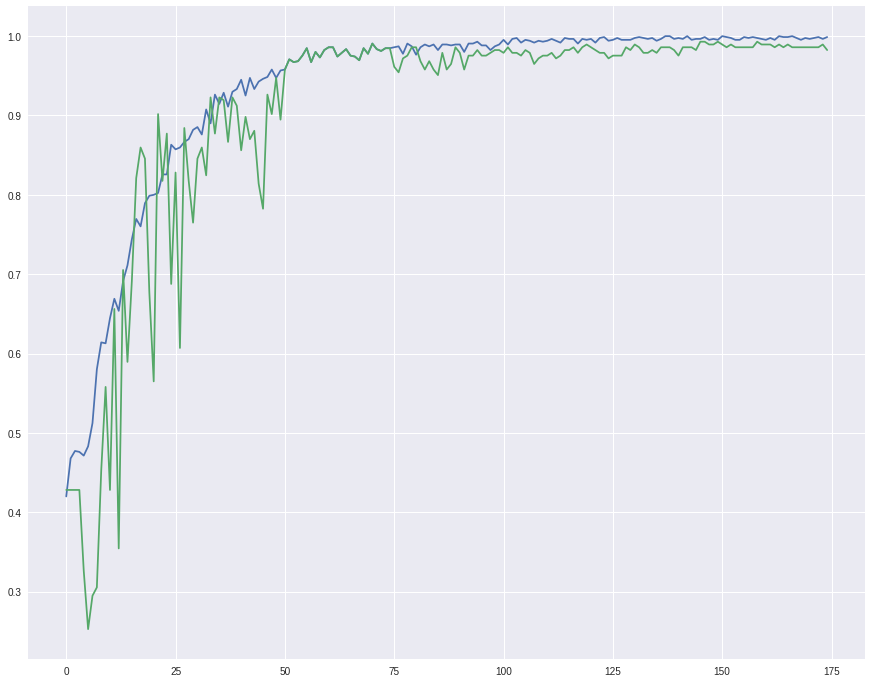

In [116]:
plt.figure(figsize=(15,12))
plt.plot(acc)
plt.plot(val_acc)
acc[-10:].mean()
val_acc[-10:].mean()

#plt.plot(SimpleNet_history.history["acc"])
#plt.plot(SimpleNet_history.history["val_acc"])

In [82]:
print("train accuracy average last 15 results :",acc[-15:].mean())
print("train standard deviation last 15 results :",acc[-15:].std())
#print("train accuracy average last 15 results :",np.array(SimpleNet_history.history["acc"][-15:]).mean())
#print("train standard deviation last 15 results :",np.array(SimpleNet_history.history["acc"][-15:]).std())

train accuracy average last 15 results : 0.9975048732943469
train standard deviation last 15 results : 0.0017539527297001233


**Parameters Search**

In [117]:
# for batch size
a={}

for i in[16,32,64,128]:
  num_classes=5
  model=create_model()
  opt_add=keras.optimizers.Adadelta()
  model.compile(optimizer=opt_add,loss="categorical_crossentropy",
                metrics=["accuracy"])
  print("batch size:",i,"start...")

  SimpleNet_history = model.fit_generator(
        train_datagen.flow(x_tr,y_tr,batch_size=i),
        steps_per_epoch=len(x_tr)/i,
        epochs=200,
        validation_data=test_datagen.flow(x_ts,y_ts,batch_size=128),
        validation_steps=len(x_ts)/128,verbose=0)
  a["{}".format(i)]=SimpleNet_history.history
  print("end i batch size model")
  

batch size: 16 start...


KeyboardInterrupt: ignored